In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import numpy as np

In [2]:
#snames = ['AMV', 'W_S', 'S_S', 'W_M', 'S_M', 'W_N', 'S_N', 'W_S_w', 'S_S_w', 'W_M_w', 'S_M_w', 'W_N_w', 'S_N_w']
#imins  = [-75,   -40,   -60,   -80,   -60,   -60,   -60,   -50,     -60,     -80,      -60,    -60,      -45]
#imaxs  = [0,     -10,   -10,   -30,   -20,   -20,   -20,   -10,     -20,     -30,      -25,    -20,      0]
#jmins  = [0,     10,    20,    25,    35,    45,    50,    10,      15,      25,       30,     40,       45]
#jmaxs  = [60,    35,    35,    50,    50,    70,    70,    25,      30,      35,       45,     60,       60]

In [25]:
datadir = '/gws/nopw/j04/acsis/jmecking/CMIP6/composites/'
figdir  = 'jet_figures/210812'

EXP          = 'piControl'
var_ts       = 'max_lats'
#var_ts       = 'max_wind'

var_field    = 'tos_-60to-20E_45to70N'
#var_field    = 'tos_-80to-30E_25to50N'
var          = 'tos'
season_ts    = 'DJF'
 
infile = (datadir + EXP + '_' + var_ts + '-' + season_ts + '_' + var_field + '_std.nc')

p_models  = ['CESM2-FV2_r1i1p1f1', 'NESM3_r1i1p1f1','EC-Earth3_r1i1p1f1','FGOALS-f3-L_r1i1p1f1', 'FIO-ESM-2-0_r1i1p1f1'] # Problem with these models - need to investigate!

#plot_lag = 0
plot_lag = -99

In [5]:
# Read in information:

ncid   = Dataset(infile,'r')
lags   = ncid.variables['lags'][:]
models = ncid.variables['models'][:]
data_mean = ncid.variables['mean'][:,:]
data_min0 = ncid.variables['min_std0'][:,:,:]
data_max0 = ncid.variables['max_std0'][:,:,:]
data_min1 = ncid.variables['min_std1'][:,:,:]
data_max1 = ncid.variables['max_std1'][:,:,:]
ncid.close()

# Remove problem models:
for pp in p_models:
    ii = np.where(models == pp)
    models    = np.delete(models,ii,axis=0)
    data_mean = np.delete(data_mean,ii,axis=0)
    data_min0 = np.delete(data_min0,ii,axis=0)
    data_max0 = np.delete(data_max0,ii,axis=0)
    data_min1 = np.delete(data_min1,ii,axis=0)
    data_max1 = np.delete(data_max1,ii,axis=0)
    

nm = len(models)
nl = np.size(lags)

# Reshape and redefine lags to be months since middle of season:
lags = lags*12
lags = np.tile(lags,(12,1)).T
for mm in range(0,12):
    lags[:,mm] = lags[:,mm] + mm
lags = np.ndarray.flatten(lags)
if season_ts == 'DJF':
    lags = lags - 1

data_min0 = np.reshape(data_min0,(len(models),nl*12))
data_max0 = np.reshape(data_max0,(len(models),nl*12))
data_min1 = np.reshape(data_min1,(len(models),nl*12))
data_max1 = np.reshape(data_max1,(len(models),nl*12))

In [6]:
# Smooth data with running mean:
rm = 3
data_min0_f = np.zeros((nm,nl*12-rm+1),'float')
data_max0_f = np.zeros((nm,nl*12-rm+1),'float')
data_min1_f = np.zeros((nm,nl*12-rm+1),'float')
data_max1_f = np.zeros((nm,nl*12-rm+1),'float')

lags_f      = np.convolve(lags,     1/rm*np.ones(3,'float'),mode='valid')
for mm in range(0,nm):
    data_min0_f[mm,:] = np.convolve(data_min0[mm,:],1/rm*np.ones(3,'float'),mode='valid')
    data_max0_f[mm,:] = np.convolve(data_max0[mm,:],1/rm*np.ones(3,'float'),mode='valid')
    data_min1_f[mm,:] = np.convolve(data_min1[mm,:],1/rm*np.ones(3,'float'),mode='valid')
    data_max1_f[mm,:] = np.convolve(data_max1[mm,:],1/rm*np.ones(3,'float'),mode='valid')

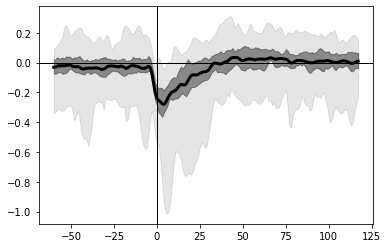

In [7]:
#for mm in range(0,nm):
#    plt.plot(lags_f,data_max1_f[mm,:] -data_min1_f[mm,:] ,lw=1)

plt.plot(lags_f,np.mean(data_max1_f-data_min1_f,axis=0),lw=3,color='k')
plt.fill_between(lags_f,np.min(data_max1_f-data_min1_f,axis=0),np.max(data_max1_f-data_min1_f,axis=0),color='k',alpha=0.1)
plt.fill_between(lags_f,np.quantile(data_max1_f-data_min1_f,0.25,axis=0),np.quantile(data_max1_f-data_min1_f,0.75,axis=0),color='k',alpha=0.4)
plt.axhline(y=0,color='k',lw=1)
plt.axvline(x=0,color='k',lw=1)

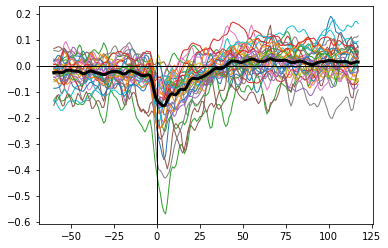

In [8]:
for mm in range(0,nm):
    plt.plot(lags_f,data_max0_f[mm,:] -data_min0_f[mm,:] ,lw=1)

plt.plot(lags_f,np.mean(data_max0_f-data_min0_f,axis=0),lw=3,color='k')

plt.axhline(y=0,color='k',lw=1)
plt.axvline(x=0,color='k',lw=1)

In [10]:
models[20]

'FIO-ESM-2-0_r1i1p1f1'

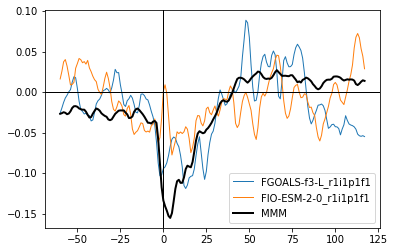

In [23]:
plt.plot(lags_f,data_max0_f[18,:] -data_min0_f[18,:] ,lw=1,label=models[18])
plt.plot(lags_f,data_max0_f[20,:] -data_min0_f[20,:] ,lw=1,label=models[20])


plt.plot(lags_f,np.mean(data_max0_f-data_min0_f,axis=0),lw=2,color='k',label='MMM')

plt.legend()
plt.axhline(y=0,color='k',lw=1)
plt.axvline(x=0,color='k',lw=1)

In [24]:
models[20]

'FIO-ESM-2-0_r1i1p1f1'

In [ ]:
np.quantile(a,0.25)